# Train the Agent if Necessary

Run the cell below to train the agent, or skip it to just used the saved model weights. If you train the agent, you will have to restart the kernel afterward because of https://github.com/Unity-Technologies/ml-agents/issues/1167

The trainer uses DDGP with actor and critic networks both with two hidden layers of 128 nodes with ReLu activations. The actor network uses batchnorm after both the first and second layers. Gradient clipping is applied to the critic network.

* BATCH_SIZE = 128        # minibatch size
* BUFFER_SIZE = int(1e5)  # replay buffer size
* GAMMA = 0.99            # discount factor
* TAU = 1e-3              # for soft update of target parameters
* LR_ACTOR = 1e-4         # learning rate of the actor
* LR_CRITIC = 1e-4        # learning rate of the critic
* WEIGHT_DECAY = 0        # L2 weight decay
* OU_THETA = 0.15         # Ornstein-Uhlenbeck noise theta
* OU_SIGMA = 0.01         # Ornstein-Uhlenbeck noise sigma


In [1]:
#%run ./DDGPTrainer.py

# Agent Visualization

-----
### Setup the Environment

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import DDGPTrainer
import torch
import pickle

Using GPU :-)


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [4]:
# get the default brain

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### Load the Saved Model and Visualize the Agent

#### Plot the training scores

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

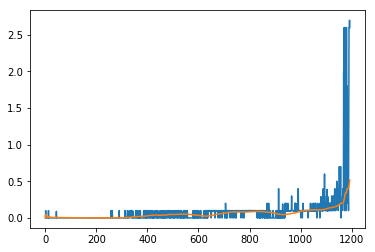

In [6]:
scores = pickle.load(open("tennis_scores.pkl", "rb"))
plt.plot(scores["scores"])
plt.plot(scores["avg_scores"])

In [7]:
agent = DDGPTrainer.Agent(state_size=state_size, action_size=action_size, random_seed=2)
agent.actor_local.load_state_dict(torch.load("actor.torch"))
agent.critic_local.load_state_dict(torch.load("critic.torch"))

In [8]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = [agent.act(state) for state in states]
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Score (max over agents) from episode: {}'.format(np.max(scores)))

Score (max over agents) from episode: 2.600000038743019


When finished, you can close the environment.

In [9]:
env.close()

### Future work

Future work could include varying the hyperparameters to see which most affect training, trying multiple random seeds and reporting confidence intervals, trying reward scaling, and trying other algorithms such as PPO or A3C.